In [1]:
import os 
import json 
import time 
import pickle 
import pandas as pd 
import csv 
import datetime
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

tweet_folders = ['/Data1/AAPL/', '/Data1/AAPL_2/', '/Data1/AAPL_3/', '/Data1/AAPL_4/', '/Data1/AAPL_5/', '/Data1/AAPL_6/', '/Data1/AAPL_7/', '/Data1/AAPL_8/', '/Data1/AAPL_9/', '/Data1/AAPL_10/']
all_tweet_objects = [] 
date_tweet_dict = {} 
date_price_dict = {}

for i in range(len(tweet_folders)):

	files = os.listdir(os.getcwd() + tweet_folders[i])

	for file in files:
	    with open(os.getcwd()+ tweet_folders[i] +file, 'r') as f:
	        cur_file_tweets = json.load(f)

	    for tweet_object in cur_file_tweets:

	        tweet_object['time'] = time.strftime('%Y-%m-%d', time.localtime(tweet_object['time']))
	        all_tweet_objects.append(tweet_object)

	        if tweet_object['time'] in date_tweet_dict:
	            date_tweet_dict[tweet_object['time']] = date_tweet_dict[tweet_object['time']] + '; ' + tweet_object['text']
	        else:
	            date_tweet_dict[tweet_object['time']] = tweet_object['text']
            
            
with open(os.getcwd() + '/Data1/CHARTS/APPLE1440.csv') as csv_file: 
    csv_reader = csv.reader(csv_file, delimiter=',') 
    line_count = 0 
    for row in csv_reader: 
        priceDate = row[0] 
        priceDate = datetime.datetime.strptime(priceDate, '%Y.%m.%d').strftime('%Y-%m-%d') 
        openPrice = row[2] 
        closePrice = row[5] 
        line_count += 1 
        date_price_dict[priceDate] = closePrice 
        
final_dict = {'tweets' : [], 'close' : [], 'adj_close' : []}

validDateList = [] 
for key, value in date_price_dict.items(): 
    if key in date_tweet_dict: 
        validDateList.append(key)  

        final_dict['tweets'].append(date_tweet_dict[key]) 
        final_dict['close'].append(float(value))
        final_dict['adj_close'].append(float(value))
        
df_stocks = pd.DataFrame(final_dict, index=validDateList)
df_stocks.sort_index(inplace=True, ascending=True)
df_stocks['prices'] = df_stocks['adj_close'].apply(np.int64)
df_stocks = df_stocks[['prices', 'tweets']]
df = df_stocks[['prices']].copy()
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [2]:

df.head()

,prices,compound,neg,neu,pos
2014-06-30,93,,,,
2014-07-01,93,,,,
2014-07-02,93,,,,
2014-07-03,94,,,,
2014-07-07,96,,,,


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'tweets'])
        ss = sid.polarity_scores(sentence)
        print(ss)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(date)

{'neg': 0.05, 'neu': 0.799, 'pos': 0.151, 'compound': 1.0}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a futur

{'neg': 0.06, 'neu': 0.804, 'pos': 0.136, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.801, 'pos': 0.135, 'compound': 1.0}
{'neg': 0.056, 'neu': 0.783, 'pos': 0.161, 'compound': 1.0}
{'neg': 0.043, 'neu': 0.817, 'pos': 0.14, 'compound': 1.0}
{'neg': 0.065, 'neu': 0.796, 'pos': 0.139, 'compound': 1.0}
{'neg': 0.06, 'neu': 0.82, 'pos': 0.12, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.794, 'pos': 0.133, 'compound': 1.0}
{'neg': 0.062, 'neu': 0.822, 'pos': 0.116, 'compound': 0.9999}
{'neg': 0.061, 'neu': 0.813, 'pos': 0.126, 'compound': 1.0}
{'neg': 0.069, 'neu': 0.803, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.089, 'neu': 0.784, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.088, 'neu': 0.784, 'pos': 0.129, 'compound': 1.0}
{'neg': 0.059, 'neu': 0.804, 'pos': 0.137, 'compound': 1.0}
{'neg': 0.045, 'neu': 0.832, 'pos': 0.123, 'compound': 1.0}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.136, 'compound': 1.0}
{'neg': 0.059, 'neu': 0.802, 'pos': 0.14, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.801, 'pos': 0.135, 

{'neg': 0.066, 'neu': 0.807, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.084, 'neu': 0.797, 'pos': 0.12, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.775, 'pos': 0.152, 'compound': 1.0}
{'neg': 0.059, 'neu': 0.799, 'pos': 0.142, 'compound': 1.0}
{'neg': 0.056, 'neu': 0.802, 'pos': 0.142, 'compound': 1.0}
{'neg': 0.058, 'neu': 0.801, 'pos': 0.141, 'compound': 1.0}
{'neg': 0.06, 'neu': 0.802, 'pos': 0.138, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.823, 'pos': 0.113, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.8, 'pos': 0.127, 'compound': 1.0}
{'neg': 0.078, 'neu': 0.802, 'pos': 0.121, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.803, 'pos': 0.133, 'compound': 1.0}
{'neg': 0.054, 'neu': 0.797, 'pos': 0.148, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.788, 'pos': 0.139, 'compound': 1.0}
{'neg': 0.074, 'neu': 0.789, 'pos': 0.138, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.799, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.084, 'neu': 0.797, 'pos': 0.119, 'compound': 1.0}
{'neg': 0.07, 'neu': 0.806, 'pos': 0.124, 'c

{'neg': 0.092, 'neu': 0.784, 'pos': 0.124, 'compound': 1.0}
{'neg': 0.091, 'neu': 0.774, 'pos': 0.135, 'compound': 1.0}
{'neg': 0.086, 'neu': 0.785, 'pos': 0.129, 'compound': 1.0}
{'neg': 0.083, 'neu': 0.788, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.084, 'neu': 0.788, 'pos': 0.129, 'compound': 1.0}
{'neg': 0.069, 'neu': 0.802, 'pos': 0.13, 'compound': 1.0}
{'neg': 0.088, 'neu': 0.798, 'pos': 0.114, 'compound': 1.0}
{'neg': 0.099, 'neu': 0.784, 'pos': 0.117, 'compound': 1.0}
{'neg': 0.084, 'neu': 0.792, 'pos': 0.124, 'compound': 1.0}
{'neg': 0.097, 'neu': 0.786, 'pos': 0.118, 'compound': 1.0}
{'neg': 0.096, 'neu': 0.794, 'pos': 0.11, 'compound': 0.9999}
{'neg': 0.064, 'neu': 0.814, 'pos': 0.122, 'compound': 1.0}
{'neg': 0.08, 'neu': 0.793, 'pos': 0.127, 'compound': 1.0}
{'neg': 0.081, 'neu': 0.792, 'pos': 0.126, 'compound': 1.0}
{'neg': 0.09, 'neu': 0.79, 'pos': 0.12, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.805, 'pos': 0.122, 'compound': 1.0}
{'neg': 0.081, 'neu': 0.808, 'pos': 0.111, 

{'neg': 0.078, 'neu': 0.786, 'pos': 0.137, 'compound': 1.0}
{'neg': 0.085, 'neu': 0.778, 'pos': 0.137, 'compound': 0.9999}
{'neg': 0.074, 'neu': 0.794, 'pos': 0.132, 'compound': 1.0}
{'neg': 0.077, 'neu': 0.788, 'pos': 0.135, 'compound': 1.0}
{'neg': 0.063, 'neu': 0.813, 'pos': 0.124, 'compound': 0.9999}
{'neg': 0.068, 'neu': 0.797, 'pos': 0.135, 'compound': 1.0}
{'neg': 0.075, 'neu': 0.788, 'pos': 0.137, 'compound': 1.0}
{'neg': 0.071, 'neu': 0.811, 'pos': 0.118, 'compound': 1.0}
{'neg': 0.068, 'neu': 0.801, 'pos': 0.131, 'compound': 1.0}
{'neg': 0.079, 'neu': 0.79, 'pos': 0.131, 'compound': 1.0}
{'neg': 0.086, 'neu': 0.782, 'pos': 0.132, 'compound': 1.0}
{'neg': 0.081, 'neu': 0.79, 'pos': 0.129, 'compound': 0.9999}
{'neg': 0.061, 'neu': 0.817, 'pos': 0.122, 'compound': 0.9999}
{'neg': 0.078, 'neu': 0.791, 'pos': 0.131, 'compound': 0.9999}
{'neg': 0.071, 'neu': 0.795, 'pos': 0.134, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.803, 'pos': 0.133, 'compound': 1.0}
{'neg': 0.065, 'neu': 0.807

{'neg': 0.076, 'neu': 0.794, 'pos': 0.13, 'compound': 1.0}
{'neg': 0.071, 'neu': 0.814, 'pos': 0.115, 'compound': 1.0}
{'neg': 0.075, 'neu': 0.812, 'pos': 0.113, 'compound': 1.0}
{'neg': 0.054, 'neu': 0.832, 'pos': 0.115, 'compound': 1.0}
{'neg': 0.09, 'neu': 0.796, 'pos': 0.114, 'compound': 1.0}
{'neg': 0.071, 'neu': 0.797, 'pos': 0.132, 'compound': 1.0}
{'neg': 0.071, 'neu': 0.803, 'pos': 0.126, 'compound': 1.0}
{'neg': 0.064, 'neu': 0.809, 'pos': 0.127, 'compound': 1.0}
{'neg': 0.087, 'neu': 0.804, 'pos': 0.109, 'compound': 0.9999}
{'neg': 0.069, 'neu': 0.813, 'pos': 0.118, 'compound': 0.9999}
{'neg': 0.08, 'neu': 0.815, 'pos': 0.105, 'compound': 0.9994}
{'neg': 0.078, 'neu': 0.791, 'pos': 0.131, 'compound': 1.0}
{'neg': 0.077, 'neu': 0.808, 'pos': 0.115, 'compound': 0.9999}
{'neg': 0.062, 'neu': 0.81, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.076, 'neu': 0.809, 'pos': 0.115, 'compound': 0.9999}
{'neg': 0.061, 'neu': 0.816, 'pos': 0.123, 'compound': 1.0}
{'neg': 0.075, 'neu': 0.804, 

{'neg': 0.059, 'neu': 0.817, 'pos': 0.124, 'compound': 0.9999}
{'neg': 0.064, 'neu': 0.824, 'pos': 0.112, 'compound': 0.9999}
{'neg': 0.068, 'neu': 0.813, 'pos': 0.119, 'compound': 0.9999}
{'neg': 0.073, 'neu': 0.787, 'pos': 0.141, 'compound': 1.0}
{'neg': 0.081, 'neu': 0.809, 'pos': 0.11, 'compound': 0.9997}
{'neg': 0.083, 'neu': 0.806, 'pos': 0.111, 'compound': 0.9996}
{'neg': 0.084, 'neu': 0.8, 'pos': 0.116, 'compound': 0.9997}
{'neg': 0.091, 'neu': 0.782, 'pos': 0.127, 'compound': 0.9999}
{'neg': 0.066, 'neu': 0.844, 'pos': 0.09, 'compound': 0.9991}
{'neg': 0.075, 'neu': 0.81, 'pos': 0.115, 'compound': 0.9998}
{'neg': 0.063, 'neu': 0.827, 'pos': 0.111, 'compound': 0.9998}
{'neg': 0.068, 'neu': 0.79, 'pos': 0.142, 'compound': 0.9999}
{'neg': 0.081, 'neu': 0.821, 'pos': 0.098, 'compound': 0.9994}
{'neg': 0.066, 'neu': 0.81, 'pos': 0.124, 'compound': 0.9999}
{'neg': 0.073, 'neu': 0.795, 'pos': 0.132, 'compound': 0.9999}
{'neg': 0.065, 'neu': 0.823, 'pos': 0.113, 'compound': 0.9999}
{'

{'neg': 0.082, 'neu': 0.806, 'pos': 0.111, 'compound': 0.9997}
{'neg': 0.082, 'neu': 0.801, 'pos': 0.117, 'compound': 0.9998}
{'neg': 0.085, 'neu': 0.802, 'pos': 0.113, 'compound': 0.9997}
{'neg': 0.078, 'neu': 0.79, 'pos': 0.132, 'compound': 1.0}
{'neg': 0.079, 'neu': 0.81, 'pos': 0.111, 'compound': 0.9998}
{'neg': 0.084, 'neu': 0.809, 'pos': 0.107, 'compound': 0.9997}
{'neg': 0.108, 'neu': 0.774, 'pos': 0.117, 'compound': 0.9998}
{'neg': 0.079, 'neu': 0.784, 'pos': 0.138, 'compound': 1.0}
{'neg': 0.074, 'neu': 0.819, 'pos': 0.107, 'compound': 0.9999}
{'neg': 0.094, 'neu': 0.802, 'pos': 0.104, 'compound': 0.9993}
{'neg': 0.072, 'neu': 0.823, 'pos': 0.105, 'compound': 0.9998}
{'neg': 0.072, 'neu': 0.806, 'pos': 0.121, 'compound': 0.9999}
{'neg': 0.06, 'neu': 0.798, 'pos': 0.142, 'compound': 1.0}
{'neg': 0.061, 'neu': 0.827, 'pos': 0.112, 'compound': 1.0}
{'neg': 0.072, 'neu': 0.798, 'pos': 0.13, 'compound': 1.0}
{'neg': 0.077, 'neu': 0.793, 'pos': 0.13, 'compound': 1.0}
{'neg': 0.074, 

{'neg': 0.074, 'neu': 0.812, 'pos': 0.114, 'compound': 1.0}
{'neg': 0.098, 'neu': 0.81, 'pos': 0.091, 'compound': -0.9953}
{'neg': 0.089, 'neu': 0.795, 'pos': 0.116, 'compound': 0.9999}
{'neg': 0.074, 'neu': 0.801, 'pos': 0.124, 'compound': 1.0}
{'neg': 0.083, 'neu': 0.773, 'pos': 0.143, 'compound': 1.0}
{'neg': 0.082, 'neu': 0.789, 'pos': 0.129, 'compound': 1.0}
{'neg': 0.07, 'neu': 0.805, 'pos': 0.125, 'compound': 1.0}
{'neg': 0.07, 'neu': 0.786, 'pos': 0.144, 'compound': 1.0}
{'neg': 0.073, 'neu': 0.79, 'pos': 0.137, 'compound': 1.0}
{'neg': 0.069, 'neu': 0.795, 'pos': 0.136, 'compound': 1.0}
{'neg': 0.071, 'neu': 0.809, 'pos': 0.12, 'compound': 0.9999}
{'neg': 0.071, 'neu': 0.779, 'pos': 0.15, 'compound': 1.0}
{'neg': 0.083, 'neu': 0.786, 'pos': 0.131, 'compound': 1.0}
{'neg': 0.088, 'neu': 0.806, 'pos': 0.106, 'compound': 0.9996}
{'neg': 0.068, 'neu': 0.82, 'pos': 0.112, 'compound': 0.9999}
{'neg': 0.063, 'neu': 0.809, 'pos': 0.128, 'compound': 0.9999}
{'neg': 0.063, 'neu': 0.827,

{'neg': 0.099, 'neu': 0.768, 'pos': 0.133, 'compound': 1.0}
{'neg': 0.105, 'neu': 0.785, 'pos': 0.11, 'compound': 0.9998}
{'neg': 0.088, 'neu': 0.788, 'pos': 0.123, 'compound': 1.0}
{'neg': 0.078, 'neu': 0.793, 'pos': 0.129, 'compound': 1.0}
{'neg': 0.07, 'neu': 0.807, 'pos': 0.123, 'compound': 1.0}
{'neg': 0.096, 'neu': 0.787, 'pos': 0.117, 'compound': 0.9999}
{'neg': 0.104, 'neu': 0.777, 'pos': 0.119, 'compound': 1.0}
{'neg': 0.096, 'neu': 0.789, 'pos': 0.114, 'compound': 1.0}
{'neg': 0.101, 'neu': 0.772, 'pos': 0.127, 'compound': 1.0}
{'neg': 0.086, 'neu': 0.795, 'pos': 0.119, 'compound': 1.0}
{'neg': 0.095, 'neu': 0.777, 'pos': 0.128, 'compound': 1.0}
{'neg': 0.11, 'neu': 0.78, 'pos': 0.109, 'compound': 0.9839}
{'neg': 0.101, 'neu': 0.777, 'pos': 0.122, 'compound': 1.0}
{'neg': 0.094, 'neu': 0.792, 'pos': 0.114, 'compound': 0.9999}
{'neg': 0.107, 'neu': 0.772, 'pos': 0.121, 'compound': 0.9999}
{'neg': 0.11, 'neu': 0.767, 'pos': 0.123, 'compound': 0.9999}
{'neg': 0.108, 'neu': 0.777

In [4]:
df.head()

,prices,compound,neg,neu,pos
2014-06-30,93,1,0.05,0.799,0.151
2014-07-01,93,1,0.06,0.804,0.136
2014-07-02,93,1,0.064,0.801,0.135
2014-07-03,94,1,0.056,0.783,0.161
2014-07-07,96,1,0.043,0.817,0.14


In [6]:
train = df.iloc[0 : int(0.8*df.shape[0])]
test = df.iloc[int(0.8*df.shape[0])+1 : df.shape[0]-1]

In [7]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [8]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [9]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def offset_value(test, predictions_df, testDates, index):
    t_index = index
    temp_date = testDates[t_index]
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    print(testDates)
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        t_index += 1
        temp_date = testDates[index]
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = testDates[index]
    print(temp_date)
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        index += 1
        temp_date = testDates[index]
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

0
datelen:115
[1.    0.05  0.799 0.151]
(92, 4)
(21, 4)
93
114
21
2014-12-01
['2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17', '2014-07-18', '2014-07-21', '2014-07-22', '2014-07-23', '2014-07-24', '2014-07-25', '2014-07-28', '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22', '2014-08-25', '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29', '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05', '2014-09-08', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03', '2014-10-06', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16', '2014-10-17', '2014-10-20', '2014-10-21'

(77, 4)
(172, 4)
697
869
172
2017-04-26
['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '2017-0

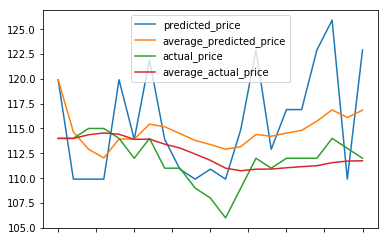

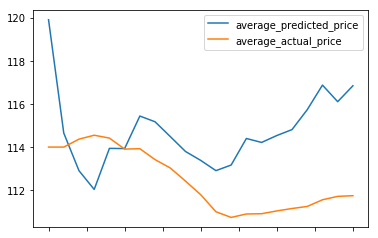

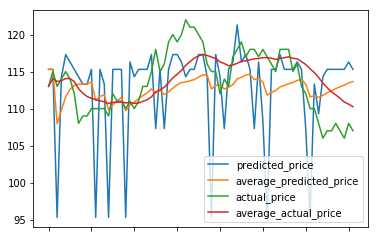

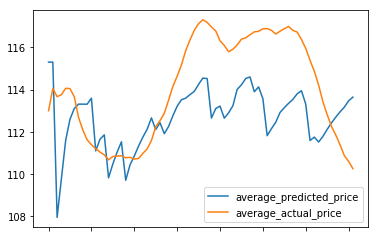

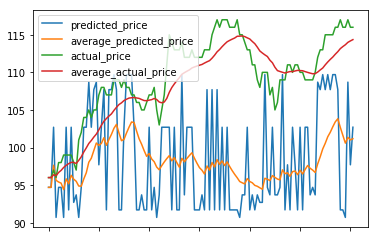

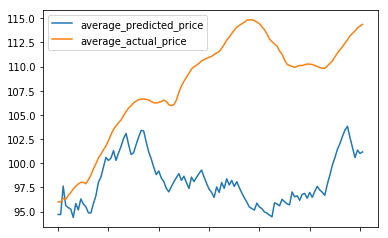

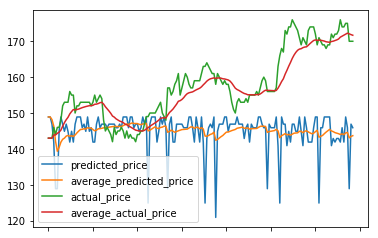

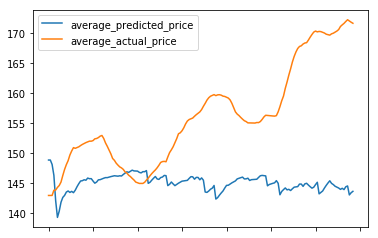

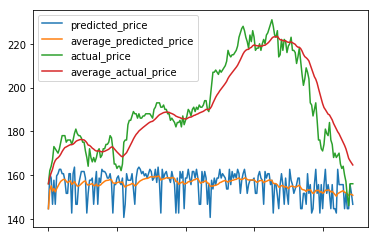

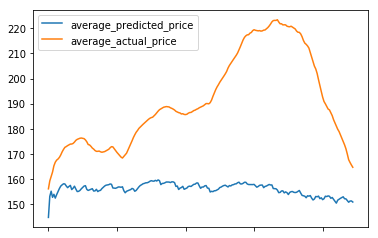

In [12]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

years = [2014, 2015, 2016, 2017, 2018]
df_index = 0
prediction_list = []
for year in years:
    print(df_index)
    yearDates = []
    for date, row in df.T.iteritems():
        dt = datetime.strptime(date, '%Y-%m-%d')
        if dt.year == year:
            yearDates.append(date)
    
    print("datelen:" + str(len(yearDates)))
    
    train = df.iloc[df_index : int(0.8*(df_index + len(yearDates)))]
    test = df.iloc[int(0.8*(df_index + len(yearDates))) + 1 : df_index + len(yearDates) - 1]
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    print(numpy_df_train[0])
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices']) 
    print(numpy_df_train.shape)
    print(numpy_df_test.shape)
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)

    print(int(0.8*(df_index + len(yearDates))) + 1)
    print(df_index + len(yearDates) - 1)
    
    testLength = (df_index + len(yearDates) - 1) - (int(0.8*(df_index + len(yearDates))) + 1)
    idx = yearDates[len(yearDates) - testLength - 1: len(yearDates) - 1]

    print(len(idx))
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    test_start_date = yearDates[len(yearDates) - testLength - 1]
    print(test_start_date)
    
    difference_test_predicted_prices = offset_value(test, predictions_df_list, yearDates, len(yearDates) - testLength - 1)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20,min_periods=0,adjust=True,ignore_na=False).mean()
    predictions_df_list['actual_value'] = test['prices']

    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20,min_periods=0,adjust=True,ignore_na=False).mean()
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
    df_index += len(yearDates)
    

In [13]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

print(rf.feature_importances_)
prediction, bias, contributions = ti.predict(rf, numpy_df_test)
contributions

[0.07604209 0.19603812 0.62377924 0.10414055]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


array([[-2.57542458e-01, -1.05560134e+00, -9.42179210e+00,
         3.04166667e-01],
       [-5.25641026e-02,  1.50655822e+00,  4.23007792e+00,
        -1.14841270e-01],
       [-2.75641026e-02,  1.46489156e+00,  4.42579220e+00,
         2.06111111e-01],
       [-1.56947219e-01,  1.46203441e+00, -2.89668976e+00,
         3.60833333e-01],
       [-4.52780553e-01,  1.29203441e+00,  8.32595957e-01,
         1.97380952e-01],
       [-1.56947219e-01, -1.24632254e-01, -2.69668976e+00,
         1.04750000e+00],
       [ 8.83449883e-02,  9.82391556e-01,  4.03007792e+00,
         3.68416306e-01],
       [ 1.88344988e-01,  9.84891556e-01,  3.97341125e+00,
        -3.77417027e-01],
       [ 1.33449883e-02,  9.40724889e-01,  4.29579220e+00,
         4.19368687e-01],
       [ 3.00116550e-02,  1.04072489e+00,  4.49245887e+00,
         5.06035354e-01],
       [-2.35897436e-01,  2.20655822e+00,  4.16007792e+00,
        -1.76150794e+00],
       [-2.35897436e-01,  2.20655822e+00,  4.16007792e+00,
      

In [14]:
testDates = []

for date, row in y_test.T.iteritems():
    testDates.append(date)

predictions_df = pd.DataFrame(data=prediction[0:], index = testDates, columns=['prices'])

In [15]:
predictions_df.head()

,prices
2018-02-09,160.0
2018-02-12,176.0
2018-02-13,176.5
2018-02-14,169.2
2018-02-15,172.3


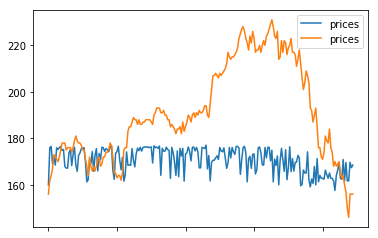

In [16]:
predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()

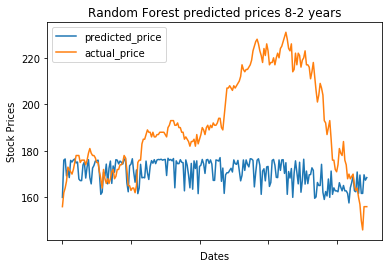

In [17]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [18]:
test.head()

,prices,compound,neg,neu,pos
2018-02-09,156,1,0.095,0.776,0.129
2018-02-12,162,1,0.062,0.815,0.124
2018-02-13,164,1,0.062,0.823,0.116
2018-02-14,167,1,0.073,0.795,0.132
2018-02-15,173,1,0.061,0.801,0.137


In [19]:
from datetime import datetime, timedelta

temp_date = testDates[0]
average_last_5_days_test = 0
total_days = 10
ctr = 0
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    ctr += 1
    temp_date = testDates[ctr]
average_last_5_days_test = average_last_5_days_test / total_days
print(average_last_5_days_test)

temp_date = testDates[0]
ctr = 0
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    ctr += 1
    temp_date = testDates[ctr]
    print(temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices

168.2
2018-02-12
2018-02-13
2018-02-14
2018-02-15
2018-02-16
2018-02-20
2018-02-21
2018-02-22
2018-02-23
2018-02-26


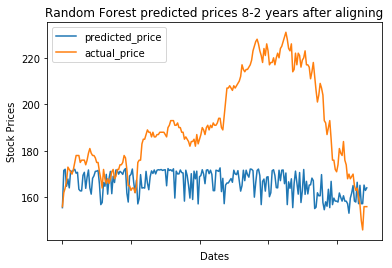

In [20]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [21]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"]

0
datelen:115
[1.    0.05  0.799 0.151]
['2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17', '2014-07-18', '2014-07-21', '2014-07-22', '2014-07-23', '2014-07-24', '2014-07-25', '2014-07-28', '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22', '2014-08-25', '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29', '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05', '2014-09-08', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03', '2014-10-06', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16', '2014-10-17', '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23', '2014-1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13', '2015-04-14', '2015-04-15', '2015

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


619
datelen:251
[0.9999 0.087  0.788  0.125 ]
['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


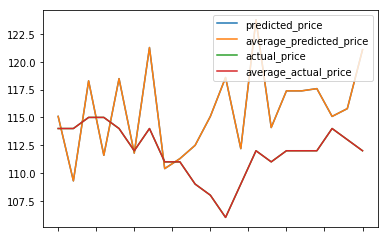

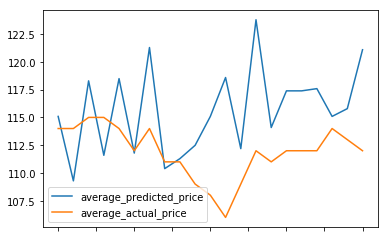

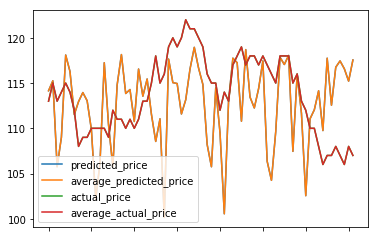

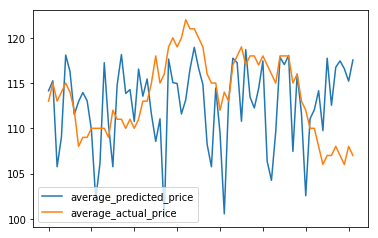

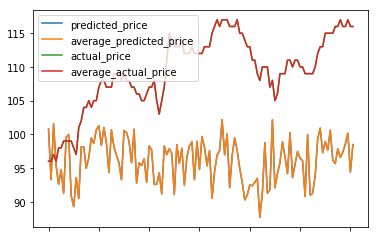

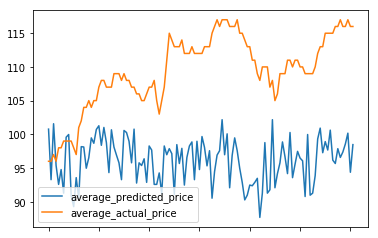

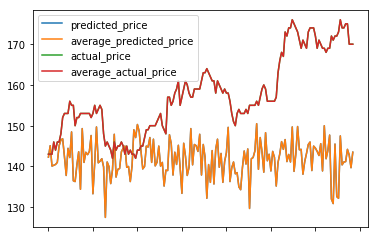

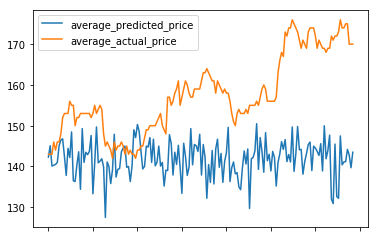

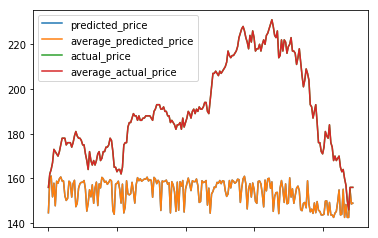

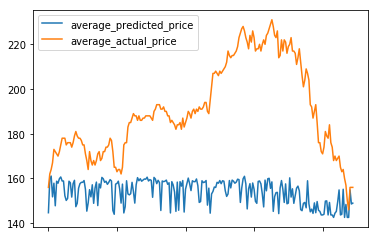

In [22]:
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor

years = [2014, 2015, 2016, 2017, 2018]
df_index = 0
prediction_list = []
for year in years:
    print(df_index)
    
    yearDates = []
    for date, row in df.T.iteritems():
        dt = datetime.strptime(date, '%Y-%m-%d')
        if dt.year == year:
            yearDates.append(date)
    
    print("datelen:" + str(len(yearDates)))
    
    train = df.iloc[df_index : int(0.8*(df_index + len(yearDates)))]
    test = df.iloc[int(0.8*(df_index + len(yearDates))) + 1 : df_index + len(yearDates) - 1]
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    print(numpy_df_train[0])
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    rf = RandomForestRegressor(random_state=None)
    rf.fit(numpy_df_train, train['prices'])
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    
    testLength = (df_index + len(yearDates) - 1) - (int(0.8*(df_index + len(yearDates))) + 1)
    idx = yearDates[len(yearDates) - testLength - 1: len(yearDates) - 1]
    
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test, predictions_df_list, yearDates, len(yearDates) - testLength - 1)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"]
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"]
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
    df_index += len(yearDates)
